# LAB 2 - Algortym ewolucyjny
Przykładowe wywołanie algorytmu:

Best candidate found:
[1.01409748 1.00000948] with score of  23.73


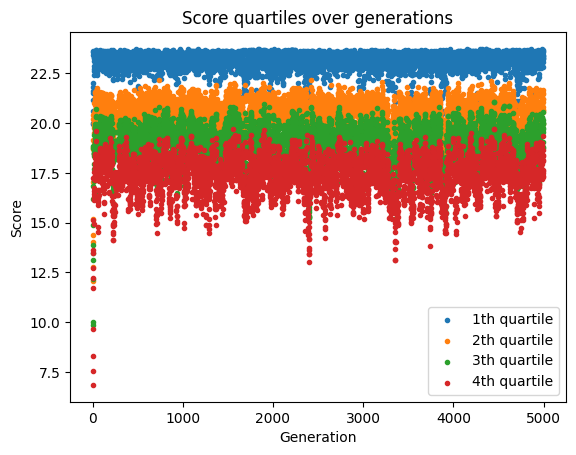

In [1]:
from evolutionary_algorithm import compute_evolution
from mutation import mutate_gauss_and_crossbreed_singlepoint
from ruletka import reproduce_ruletka_style
from simulation import simulate_factory_locations
from population import Population
from matplotlib import pyplot as plt
import numpy as np

# Parametry algorytmu:
N = 100
limit_kratowy = 1.25
iter = 5000
sigma = 0.05
pop = Population.generate(N, limit_kratowy)
# ------------------------------------------ #

best_score, best_specimen, _, _, score_quartiles_over_time = compute_evolution(pop,
                                                                             simulate_factory_locations,
                                                                             reproduce_ruletka_style,
                                                                             mutate_gauss_and_crossbreed_singlepoint,
                                                                             sigma,
                                                                             iter)

print(
    f"Best candidate found:\n{best_specimen} with score of {best_score: 0.2f}")

X = np.arange(len(score_quartiles_over_time))
for it, quartile in enumerate(np.array(score_quartiles_over_time).T):
    plt.scatter(X, quartile, label=f"{it+1}th quartile", marker='.')

plt.xlabel("Generation")
plt.ylabel("Score")
plt.title("Score quartiles over generations")

plt.legend()
plt.show()


# E1: Test wpływu sigmy na jakość i szybkość znalezienia optimum

Na początek załóżmy populację wielkości 25 osobników na przestrzeni 2000 iteracji. Zbadamy jakości rozwiązań na przestrzeni czasu w zależności od różnych wartości współczynnika mutacji sigma. 

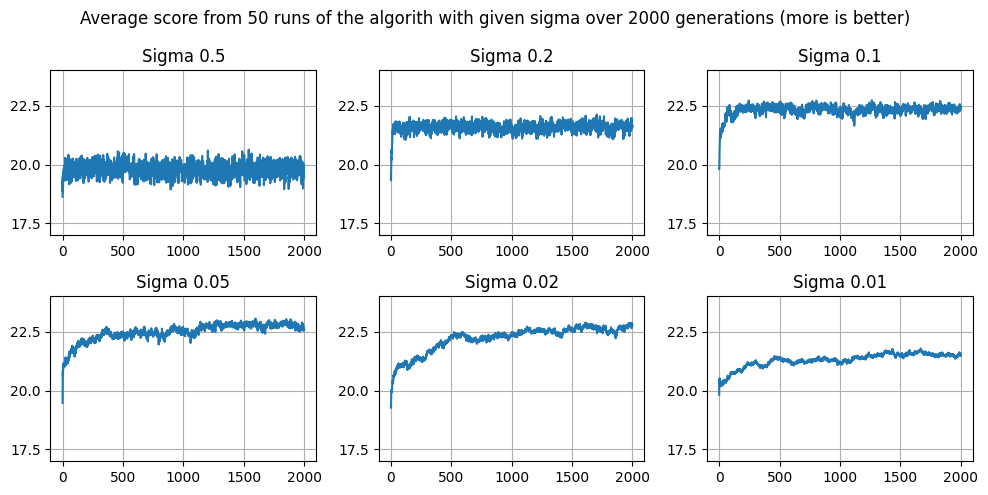

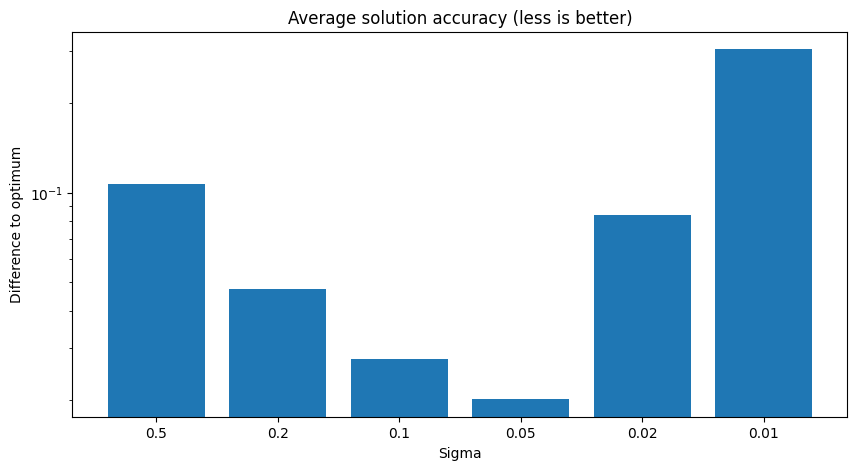

In [1]:
from population import Population
from plot_utils import plot_evolution_performance_per_sigma

# Parametry algorytmu:
N = 50
limit_kratowy = 1.25
iter = 2000
sigmas = [
    0.5,
    0.2,
    0.1,
    0.05,
    0.02,
    0.01,
]
samples = 50
# ------------------------------------------ #

plot_evolution_performance_per_sigma(N,
                                     limit_kratowy,
                                     sigmas,
                                     iter,
                                     n_samples=samples)


# Wnioski

Na grafie pierwszym można spostrzec, że większa sigma pozwala na szybsze dotarcie do optimum, dzięki większym skokom przy mutacjach w pierwszych generacjach działaniu algorytmu. Ma to jednak wadę w postaci niższej dokładności, tak jak to jest przedstawione na wykresie drugim. Dzięi dużej sigmie algorym szybko wskoczy w rejon optimum, lecz będzie miał problem z dokładnością. Dla sigm mniejszych niż 0.05 nie starczyło generacji by osiągnęły optimum, ze względu na ich powolną mutację. Stąd dla działania dokładnego i szybkiego dla tego zadania sugeruję użycie sigmy 0.05. Jest to dobry kompromis pomiędzy dokładnością a szybkością osiągania optimum.

# E2: Test wpływu wielkości populacji na jakość i szybkość znalezienia optimum

W tym eksperymencie zbadamy jaki wpływ na działanie algorytmu ma ilość osobników w populacji, dla sigmy równej 0.1 oraz ilości iteracji równej 2000.

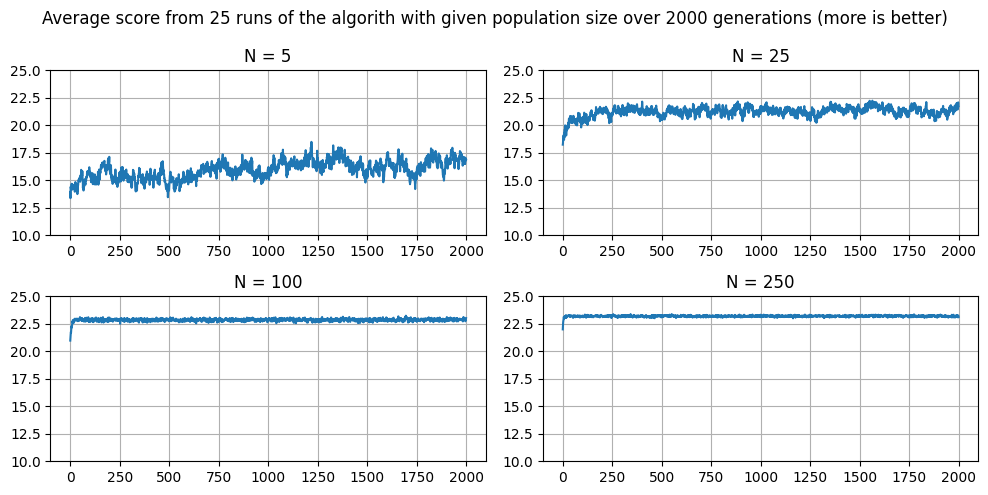

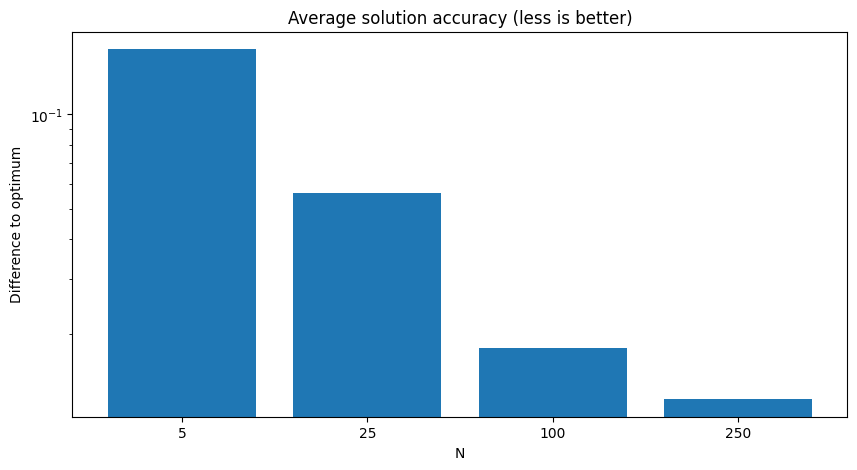

In [2]:
from population import Population
from plot_utils import plot_evolution_performance_per_n

# Parametry algorytmu:
N = [
    5,
    25,
    100,
    250
]
limit_kratowy = 1.25
iter = 2000
sigma = 0.1
samples = 25
# ------------------------------------------ #

plot_evolution_performance_per_n(N,
                                 limit_kratowy,
                                 sigma,
                                 iter,
                                 samples)


# Wnioski

Na grafie pierwszym można spostrzec, że większa populacja pozwala na szybsze dotarcie do optimum, dzięki większemu pokryciu przeszukiwanej przestrzeni. Ma to jednak wadę w postaci zwiększonego fizycznego czasu wykonywania się obliczeń. Na drugim wykresie widać także, że większa populacja pozwala na znalezienie dokładniejszego optimum, znów ze względu na większe pokrycie przestrzeni. Biorąc te fakty pod uwagę, do tego zadania sugeruję więlkość populacji rzędu około 100 osobników. Daje ona dobrą dokładność i adekwatny czas obliczeń.